## Black Friday

### What is Black Friday?

It is an unofficial holiday in many states in the US and a major day for both shoppers and sellers. With Christmas just a month later, Black Friday serves as an opportunity for customers to do their Christmas shopping while retailers also try to drive up their profits by generating more sales.

 Black Friday has become one of the main shopping days for people around the world due to the wide variety of discounts and offers it offers. The Black Friday sales also give shoppers the opportunity to take advantage of limited-time deals and find the best ones available.

 Black Friday is a colloquial term for the Friday after Thanksgiving in the United States. It traditionally marks the start of the Christmas shopping season in the United States. Many stores offer highly promoted sales at discounted prices and often open early, sometimes as early as midnight or even on Thanksgiving.

### Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behavior (specifically, purchase amount) against various products of different categories. They have shared purchase summaries of various customers for selected high-volume products from last month. The data set also contains customer demographics (age, gender, marital status, city type, stayincurrentcity), product details (productid and product category), and Total purchase amount from last month.

Now, they want to build a model to predict the purchase amount of customers against various products which will help them to create a personalized offer for customers against different products.

#### Variable Definition

In [249]:
# User_ID  User ID
# Product_ID  Product ID
# Gender  Sex of User
# Age Age in bins
# Occupation Occupation (Masked)
# City_Category  Category of the City (A,B,C)
# Stay_In_Current_City_Years Number of years stay in current city
# Marital_Status Marital Status
# Product_Category_1 Product Category (Masked)
# Product_Category_2 Product may belongs to other category also (Masked)
# Product_Category_3 Product may belongs to other category also (Masked)
# Purchase Purchase Amount (Target Variable)

##### Importing Libraries and Loading data

In [1]:
# library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# library for data processing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# library for modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, StratifiedKFold

# library for model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

#### 2. Data Understanding
2.1 Read data with pandas

In [2]:
data = pd.read_csv(r'C:\Users\LENOVO\Downloads\ML Project\Black Friday Sales.csv')#read the dataset by using path
data.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [11]:
data.shape#give info about rows and columns

(550068, 12)

In [12]:
data.info(verbose=True)#verbose give detail information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Age should be treated as a numerical column

City_Category we can convert this to a numerical column and should look at the frequency of each city category.

Gender has two values and should be converted to binary values

In [116]:
data.describe() #this method gives you some statistical information

User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       376430.000000       166821.000000  550068.000000  
mean             9.842329           12.668243    9263.968713  
std              5.086590            4.125338    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5.000000            9.000000    5823.000000  
50%              9.000000           14.000000    8047.000000  
75%             15.000000           16.000000   12054.000000  
max             18.000000           18.000000   23961.000000

##### check its basic statistics, missing values, and unique values.

In [5]:
data.isnull()#check if the value is null or not null and the value which is null comes out False and other is True

User_ID  Product_ID  Gender    Age  Occupation  City_Category  \
0         False       False   False  False       False          False   
1         False       False   False  False       False          False   
2         False       False   False  False       False          False   
3         False       False   False  False       False          False   
4         False       False   False  False       False          False   
...         ...         ...     ...    ...         ...            ...   
550063    False       False   False  False       False          False   
550064    False       False   False  False       False          False   
550065    False       False   False  False       False          False   
550066    False       False   False  False       False          False   
550067    False       False   False  False       False          False   

        Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                            False           False               False   
1                            False           False               False   
2                            False           False               False   
3                            False           False               False   
4                            False           False               False   
...                            ...             ...                 ...   
550063                       False           False               False   
550064                       False           False               False   
550065                       False           False               False   
550066                       False           False               False   
550067                       False           False               False   

        Product_Category_2  Product_Category_3  Purchase  
0                     True                True     False  
1                    False               False     False  
2                     True                True     False  
3                    False                True     False  
4                     True                True     False  
...                    ...                 ...       ...  
550063                True                True     False  
550064                True                True     False  
550065                True                True     False  
550066                True                True     False  
550067                True                True     False  

[550068 rows x 12 columns]

In [3]:
data.isnull().sum()#check if the value is null or not null

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
data.duplicated().sum()#no duplicate values

0

##### Null Value in percentage

In [4]:
data.isnull().sum()/data.shape[0]*100 # % of the null values in the data

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

##### Unique elements in each attributes

In [121]:
data.nunique() #unique value in the data help us to differentiate in the their specific category

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [122]:
data.columns #columns in the data

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

## EDA

Lets start with the purchase column

#### Purchase

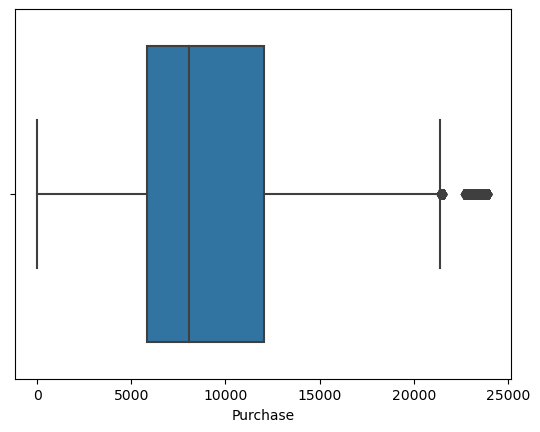

In [37]:
sns.boxplot(x=data["Purchase"])
plt.show()

In [38]:
data["Purchase"].skew()

0.6001400037087128

In [39]:
data["Purchase"].kurtosis()

-0.3383775655851702

In [40]:
data["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [41]:
mean_tb=data['Purchase'].mean()
median_tb=data['Purchase'].median()
mode_tb=data['Purchase'].mode()

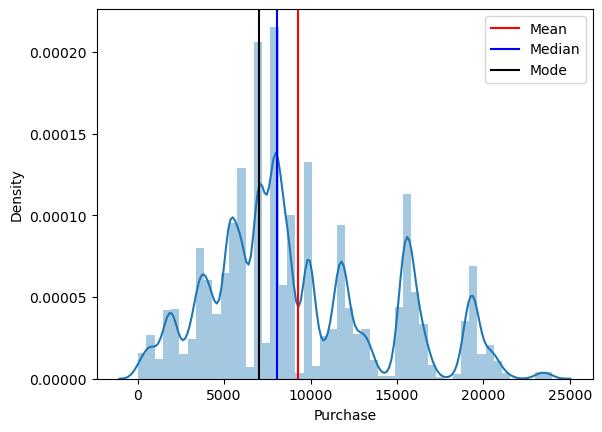

In [42]:
sns.distplot(data['Purchase'])
plt.axvline(mean_tb,label='Mean',color='red')
plt.axvline(median_tb,label='Median',color='blue')
plt.axvline(mode_tb[0],label='Mode',color='black')
plt.legend()
plt.show()

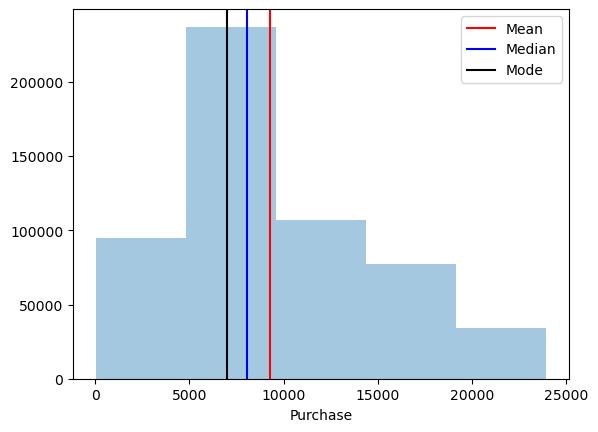

In [43]:
sns.distplot(data['Purchase'],bins=5,kde=False)
plt.axvline(mean_tb,label='Mean',color='red')
plt.axvline(median_tb,label='Median',color='blue')
plt.axvline(mode_tb[0],label='Mode',color='black')
plt.legend()
plt.show()

###### Target Variable Purchase

#### Purchase distribution

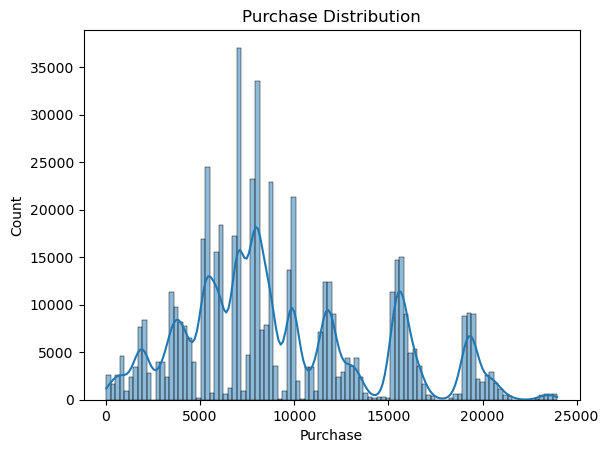

In [44]:
sns.histplot(data["Purchase"],kde=True,bins=100)
plt.title("Purchase Distribution")
plt.show()

We can observe that purchase amount is repeating for many customers.This may be because on Black Friday many are buying discounted products in large numbers and kind of follows a Gaussian Distribution.

### Analysis by Gender, Marital Status, occupation, occupation vs purchase, purchase by city, purchase by age group, etc

### Gender

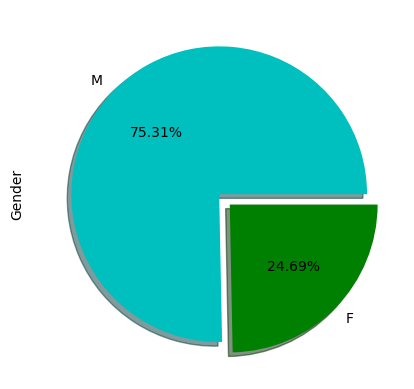

In [6]:
data['Gender'].value_counts().plot(kind='pie',explode=[0,0.1],autopct='%0.2f%%',colors=['c','g'],shadow=True)
plt.show()

%75 of customers are male and %25 of customers are female. On average, males spent more money.

In [18]:
data['Gender'].value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

There are more males than females

In [19]:
data.groupby("Gender").mean()["Purchase"]

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

On average the male gender spends more money on purchase contrary to female, and it is possible to also observe this trend by adding the total value of purchase.

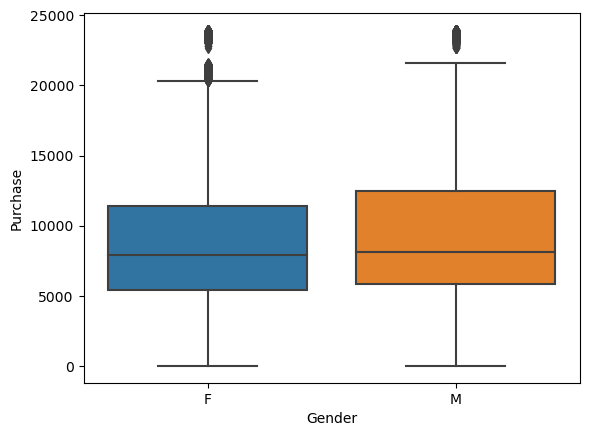

In [20]:
# Analysis by Gender
sns.boxplot(x=data["Gender"], y=data["Purchase"])
plt.show()

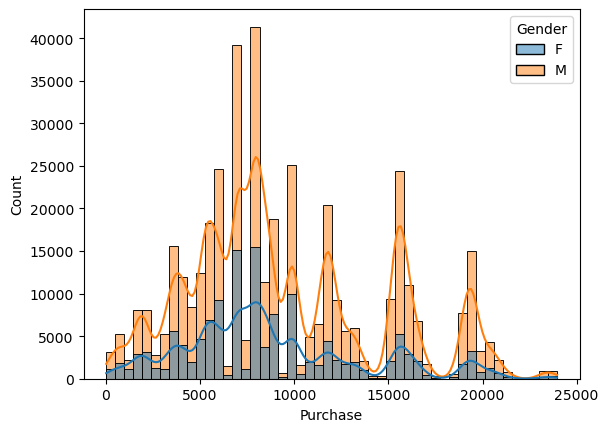

In [22]:
sns.histplot(x='Purchase', data=data, kde=True, hue='Gender',bins=50)
plt.show()

#### Marital Status

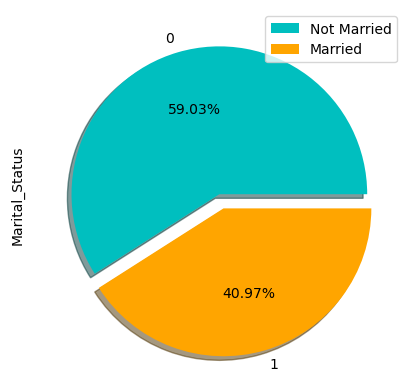

In [24]:
data['Marital_Status'].value_counts().plot(kind='pie',explode=[0,0.1],autopct='%0.2f%%',colors=['c','orange'],shadow=True)
plt.legend(['Not Married','Married'])
plt.show()

There are 59% unmarried people in the dataset and 40.97% married people. 

In [25]:
data.groupby("Marital_Status").mean()["Purchase"]

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

#### Purchase vs Marital Status

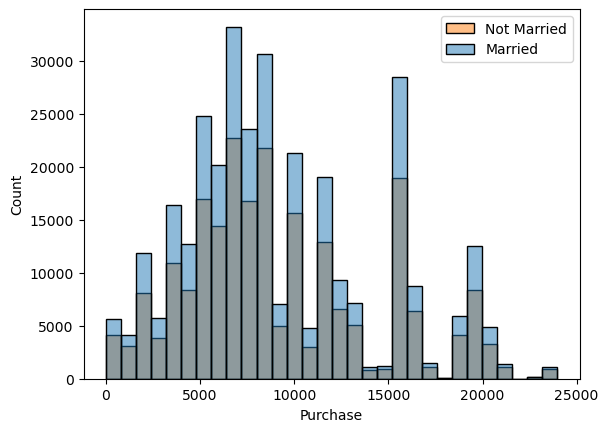

In [28]:
sns.histplot(x='Purchase', data=data, kde=False, hue='Marital_Status',bins=30)
plt.legend(['Not Married','Married'])
plt.show()

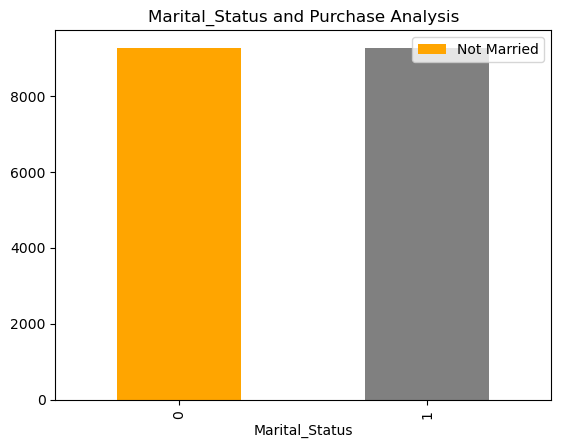

In [33]:
data.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar',color=['orange','grey'])
plt.title("Marital_Status and Purchase Analysis")
plt.legend(['Not Married','Married'])
plt.show()

This is interesting though unmarried people spend more on purchasing, the average purchase amount of married and unmarried people are the same.

#### Occupation

In [3]:
from plotly.offline import init_notebook_mode, plot, iplot
plt.figure(figsize=(6,4))
labels = list(data.Occupation.value_counts().index)
values = list(data.Occupation.value_counts().values)

fig = {"data":[{"labels" : labels,"values" : values,"hoverinfo" :'label+percent',"domain": {"x": [0, .9]},"type" : "pie",
            "rotation":120,},],"layout": {"title" : "Distribution of the Occupation",
       "annotations": [{"font": {"size":20},"showarrow": True,"text": "Occupation", "x":0.2,"y":0.9,},]}}
iplot(fig)
plt.show()

<Figure size 600x400 with 0 Axes>

Half of the customers have 4-0-7-1-17 occupations. Occupation 4 is top spender.

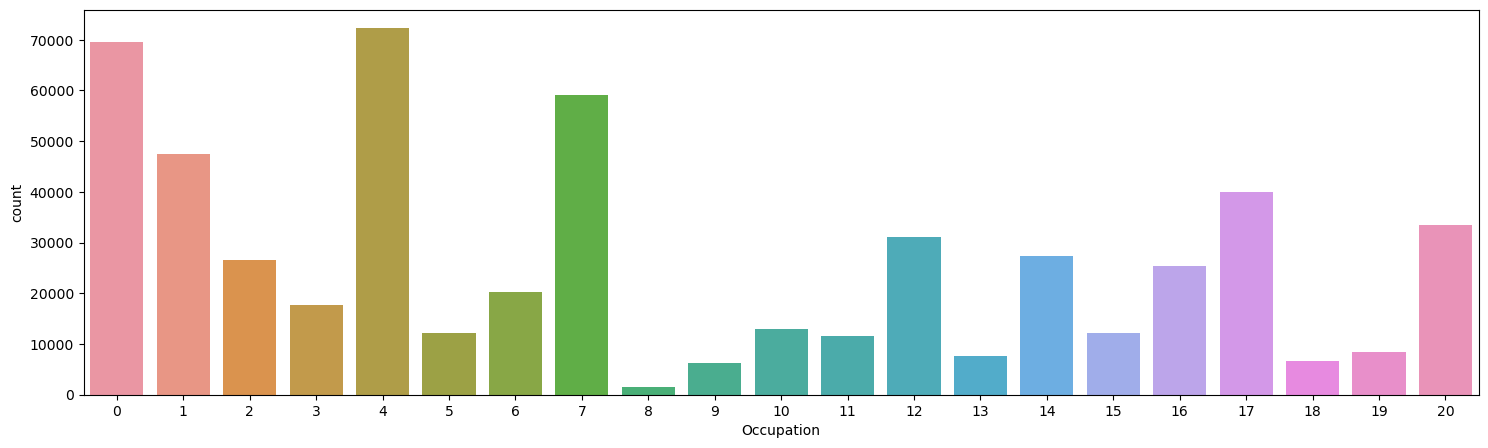

In [209]:
#Analysis on Occupation
plt.figure(figsize=(18,5))
sns.countplot(data['Occupation'])
plt.show()

Occupation has at least 20 different values. Since we do not known to each occupation each number corresponds, is difficult to make any analysis. Furthermore, it seems we have no alternative but to use since there is no way to reduce this number

In [210]:
occup = pd.DataFrame(data.groupby("Occupation").mean()["Purchase"])
occup


Purchase
Occupation             
0           9124.428588
1           8953.193270
2           8952.481683
3           9178.593088
4           9213.980251
5           9333.149298
6           9256.535691
7           9425.728223
8           9532.592497
9           8637.743761
10          8959.355375
11          9213.845848
12          9796.640239
13          9306.351061
14          9500.702772
15          9778.891163
16          9394.464349
17          9821.478236
18          9169.655844
19          8710.627231
20          8836.494905

Values of the 20 occupation

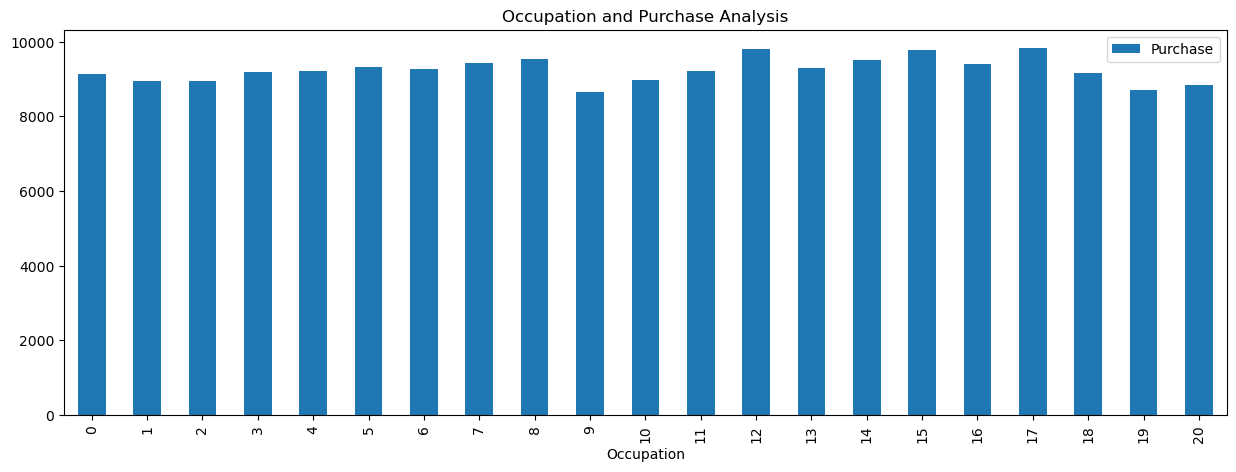

In [216]:
occup.plot(kind='bar',figsize=(15,5))
plt.title("Occupation and Purchase Analysis")
plt.show()

Although there are some occupations which have higher representations, it seems that the amount each user spends on average is more or less the same for all occupations. Of course, in the end, occupations with the highest representations will have the highest amounts of purchases.

##### Purchase vs Occupation

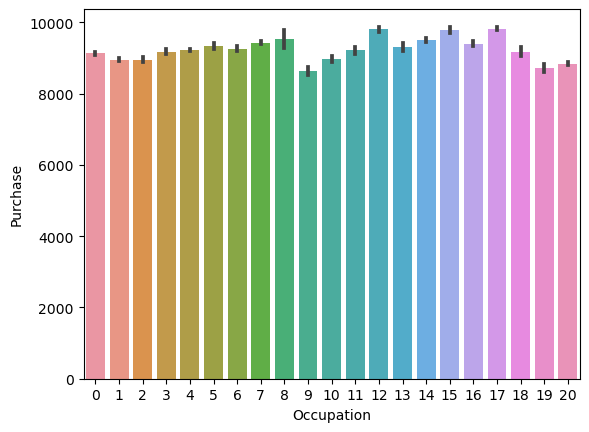

In [246]:
sns.barplot(x=data["Occupation"], y=data["Purchase"])
plt.show()

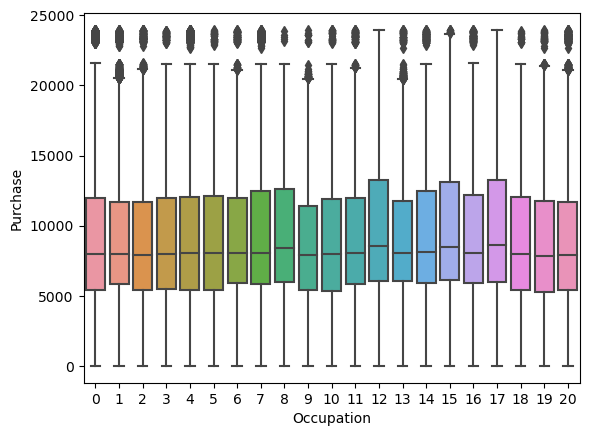

In [218]:
sns.boxplot(x=data["Occupation"], y=data["Purchase"])
plt.show()

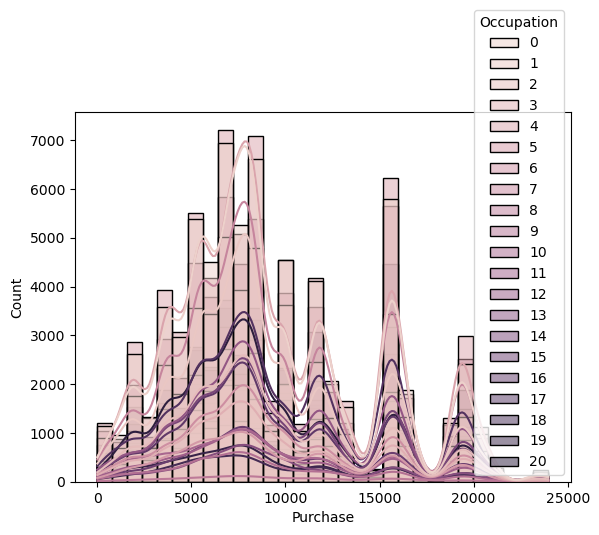

In [40]:
sns.histplot(x='Purchase', data=data, kde=True, hue='Occupation',bins=30)
plt.show()

##### City_Category

##### Number of unique users by city

In [35]:
data.groupby('City_Category', as_index=False).agg({'User_ID': 'nunique'}).sort_values('User_ID', ascending=False)

City_Category  User_ID
2             C     3139
1             B     1707
0             A     1045

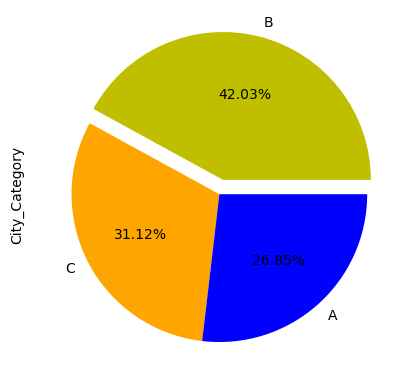

In [36]:
data['City_Category'].value_counts().plot(kind='pie',explode=[0.1,0,0],autopct='%0.2f%%',colors=['y','orange','blue'])
plt.show()

In City Category A is 26.85% , B is 42.03% , C is 31.12%

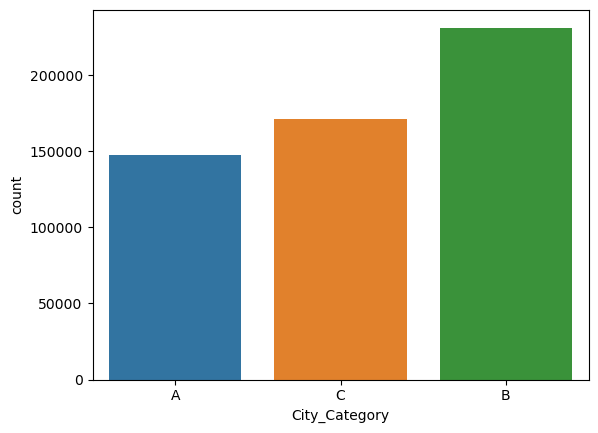

In [41]:
# Analysis by City
sns.countplot(data['City_Category'])
plt.show()

It is observed that city category B has made the most number of purchases.

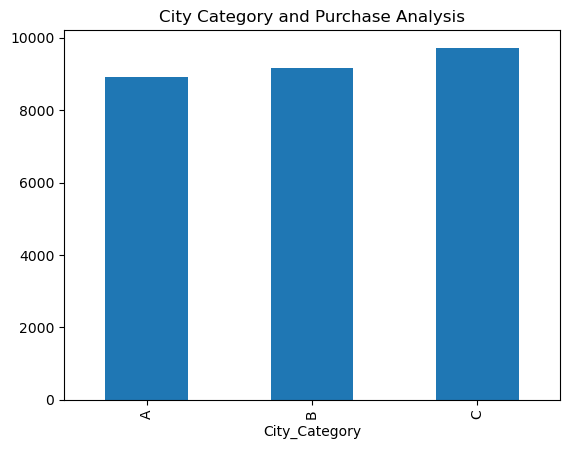

In [58]:
data.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()

##### Purchase vs City_Category

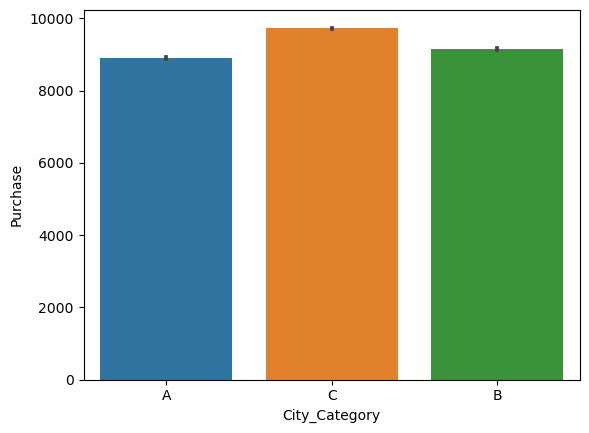

In [59]:
sns.barplot(x=data["City_Category"], y=data["Purchase"])
plt.show()

However, the city whose buyers spend the most is city type ‘C’.

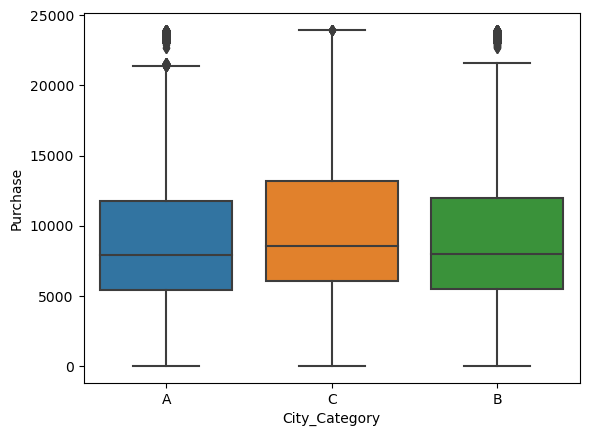

In [60]:
sns.boxplot(x=data["City_Category"], y=data["Purchase"])
plt.show()

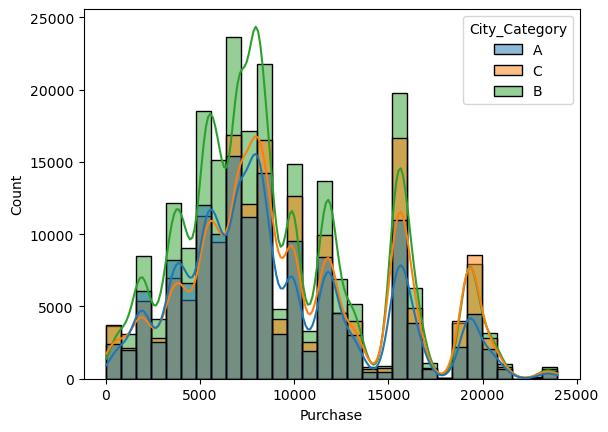

In [39]:
sns.histplot(x='Purchase', data=data, kde=True, hue='City_Category',bins=30)
plt.show()

This is the visualization of the city with respect to their purchases 

##### Stay_In_Current_City_Years

2, 4+, 3, 1, 0 = Stay in Current City Year are distributed in this category

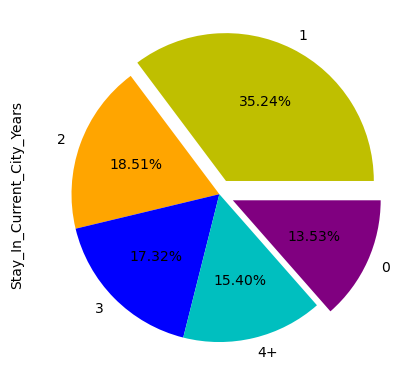

In [42]:
data['Stay_In_Current_City_Years'].value_counts().plot(kind='pie',explode=[0.1,0,0,0,0.1],autopct='%0.2f%%',
                                                       colors=['y','orange','blue','c','purple'])
plt.show()

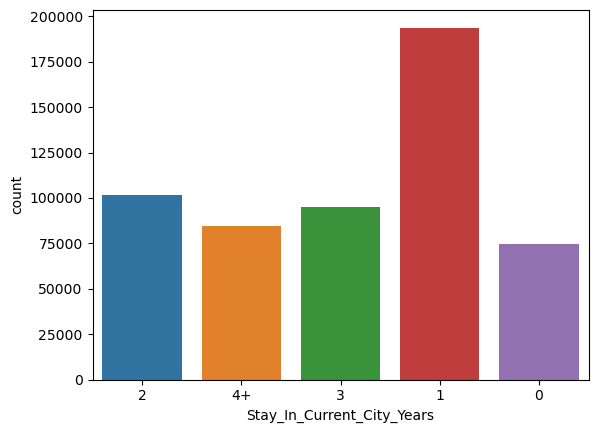

In [43]:
sns.countplot(data['Stay_In_Current_City_Years'])
plt.show()

It looks like the longest someone is living in that city the less prone they are to buy new things. Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.

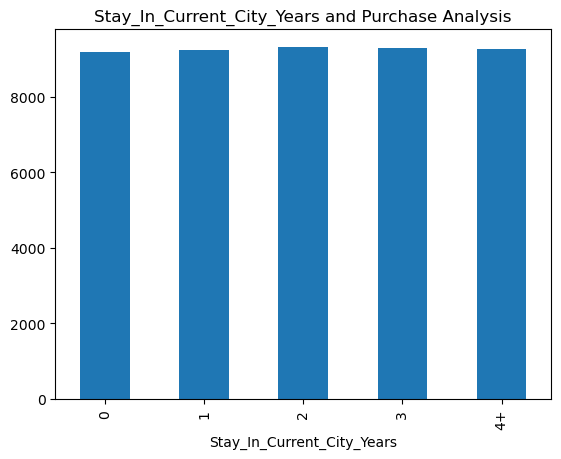

In [44]:
data.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()

We see the same pattern seen before which show that on average people tend to spend the same amount on purchases regardeless of their group. People who are new in city are responsible for the higher number of purchase, however looking at it individually they tend to spend the same amount independently of how many years the have lived in their current city.

##### Purchase Vs Stay in Current City

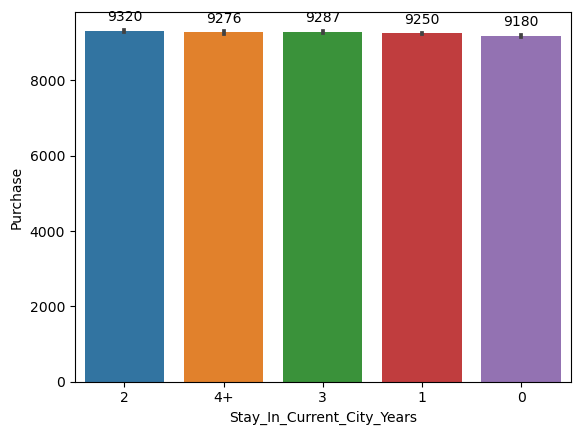

In [61]:
ax = sns.barplot(x=data['Stay_In_Current_City_Years'], y=data['Purchase'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.show()

This is the purchasing rate of the people with respect to their Stay in Current City i.e how many years they have lived in their 
current city

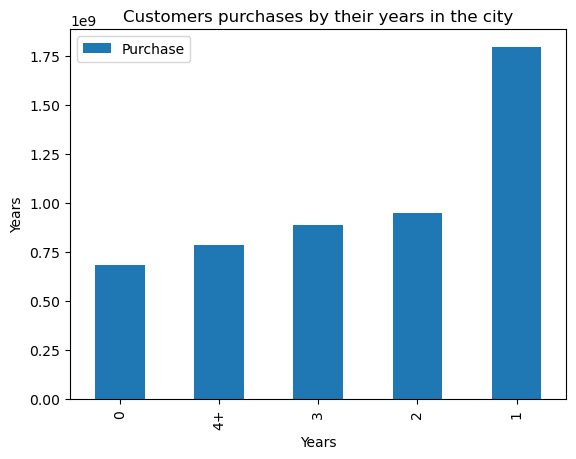

In [62]:
city_dur=data[['Stay_In_Current_City_Years','Purchase']].groupby('Stay_In_Current_City_Years').sum()
city_dur=city_dur.sort_values(by='Purchase')
city_dur.plot(kind='bar',xlabel='Years',ylabel='Years',title='Customers purchases by their years in the city')
plt.show()

It's seems that the longer customers stay in the city, the more their purchases will decline. Maybe they discover other markets...

#### Age

In [4]:
from plotly.offline import init_notebook_mode, plot, iplot
plt.figure(figsize=(6,4))
labels = list(data.Age.value_counts().index)
values = list(data.Age.value_counts().values)

fig = {"data":[{"labels" : labels,"values" : values,"hoverinfo" :'label+percent',"domain": {"x": [0, .9]},"type" : "pie",
            "rotation":120,},],"layout": {"title" : "Agewise Distribution",
       "annotations": [{"font": {"size":20},"showarrow": True,"text": "Group of Different Ages", "x":0.2,"y":0.9,},]}}
iplot(fig);

<Figure size 600x400 with 0 Axes>

%40 of customers are between 26-35 year old and %20 of customers are between 36-45 year old. 51-55 year old customers spent money the most.

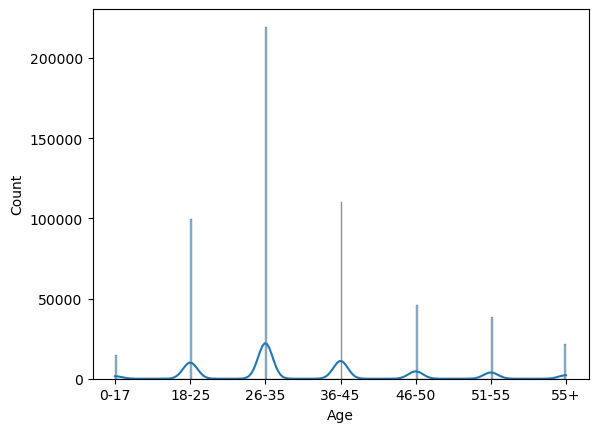

In [63]:
sns.histplot(data["Age"], kde=True).set_xticklabels([ '0', '0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.show()

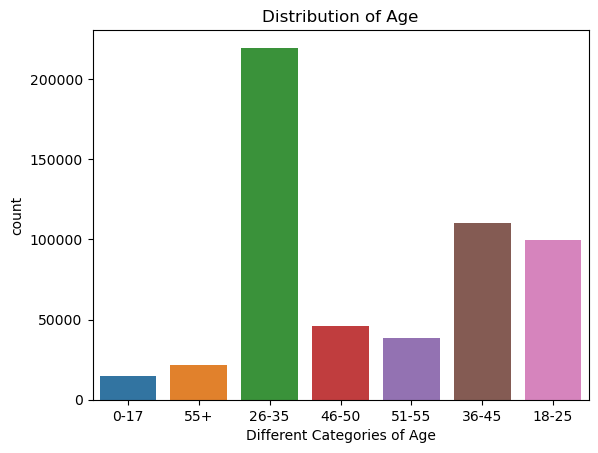

In [46]:
sns.countplot(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()


Age 26-35 Age group makes the most no of purchases in the age group.

#### Age Vs Purchase

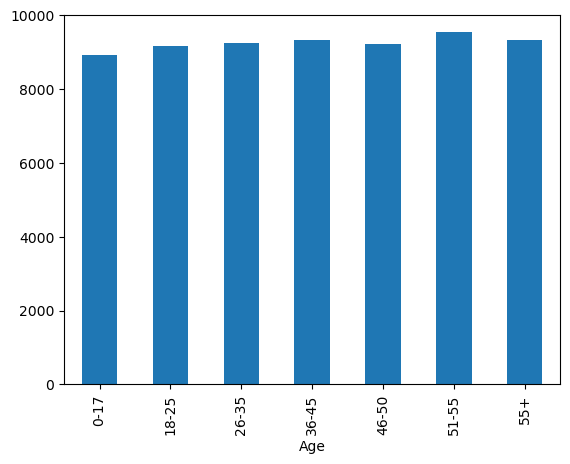

In [47]:
data.groupby("Age").mean()["Purchase"].plot(kind='bar')
plt.show()

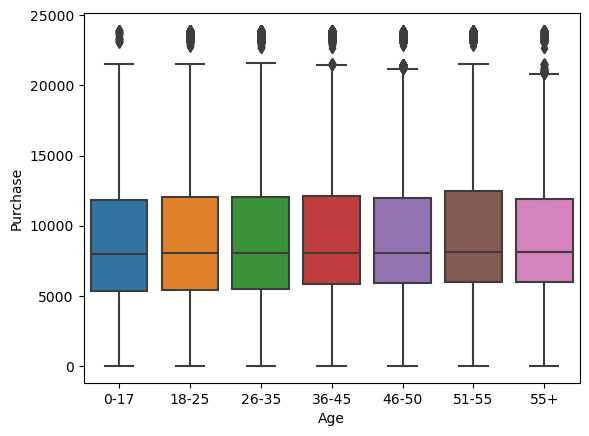

In [66]:
sns.boxplot(x=data["Age"], y=data["Purchase"]).set_xticklabels([  '0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.show()

Mean puchase rate between the age groups tends to be the same except that the 51-55 age group has a little higher average purchase amount

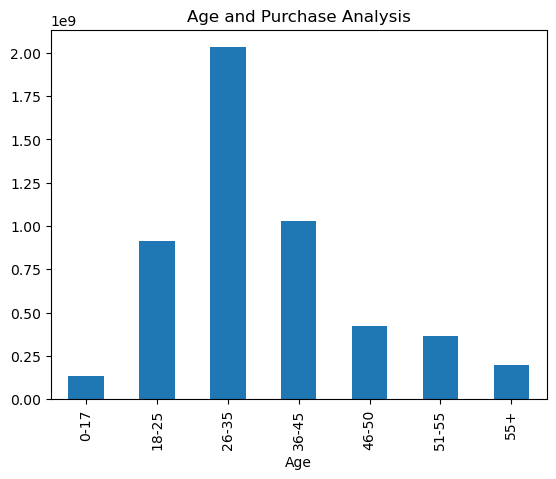

In [48]:
data.groupby("Age").sum()['Purchase'].plot(kind="bar")
plt.title("Age and Purchase Analysis")
plt.show()

Total amount spent in purchase is in accordance with the number of purchases made, distributed by age.

###### Lets Start the main part i.e Analysis of different product with respect to their purchase rate

### ProductCategory1

In [5]:
from plotly.offline import init_notebook_mode, plot, iplot
plt.figure(figsize=(6,4))
labels = list(data.Product_Category_1.value_counts().index)
values = list(data.Product_Category_1.value_counts().values)

fig = {"data":[{"labels" : labels,"values" : values,"hoverinfo" :'label+percent',"domain": {"x": [0, .9]},"type" : "pie",
            "rotation":120,},],"layout": {"title" : "Distribution of the Product",
       "annotations": [{"font": {"size":20},"showarrow": True,"text": "ProductCategory1", "x":0.2,"y":0.9,},]}}
iplot(fig)
plt.show()

<Figure size 600x400 with 0 Axes>

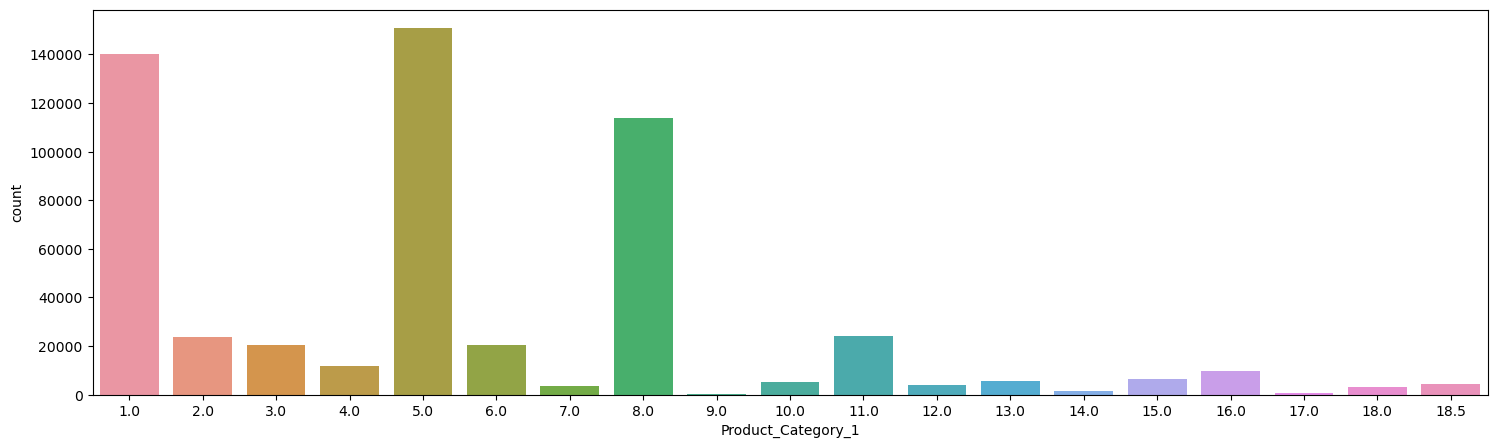

In [50]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_1'])
plt.show()

It is clear that ProductCategory1 numbers 1,5 and 8 stand out. Unfortunately we don't know which product each number represents as it is masked.

#### Product Vs Category1

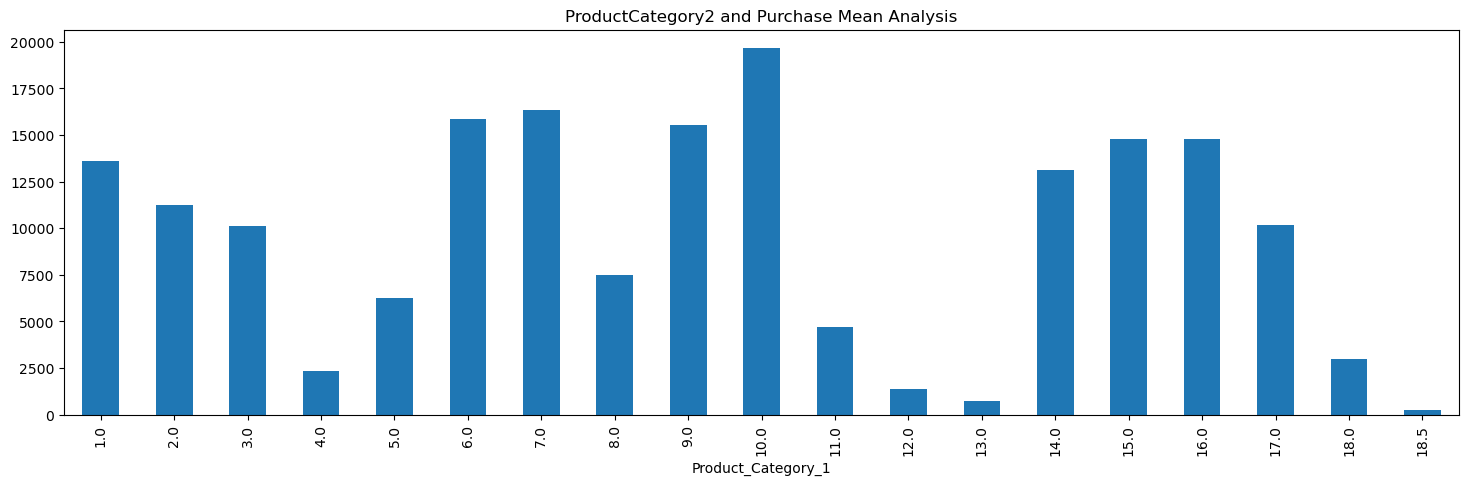

In [51]:
data.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("ProductCategory2 and Purchase Mean Analysis")
plt.show()

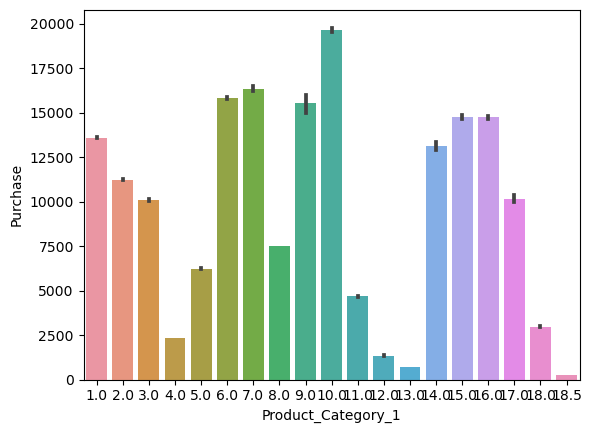

In [55]:
sns.barplot(x=data["Product_Category_1"], y=data["Purchase"])
plt.show()

If you see the value spent on average for ProductCategory1 you see that although there were more products bought for categories 1,5,8 the average amount spent for those three is not the highest. It is interesting to see other categories i.e 10,7,6,15,16,1 appearing with high purchase values despite having low impact on sales number.

### ProductCategory2

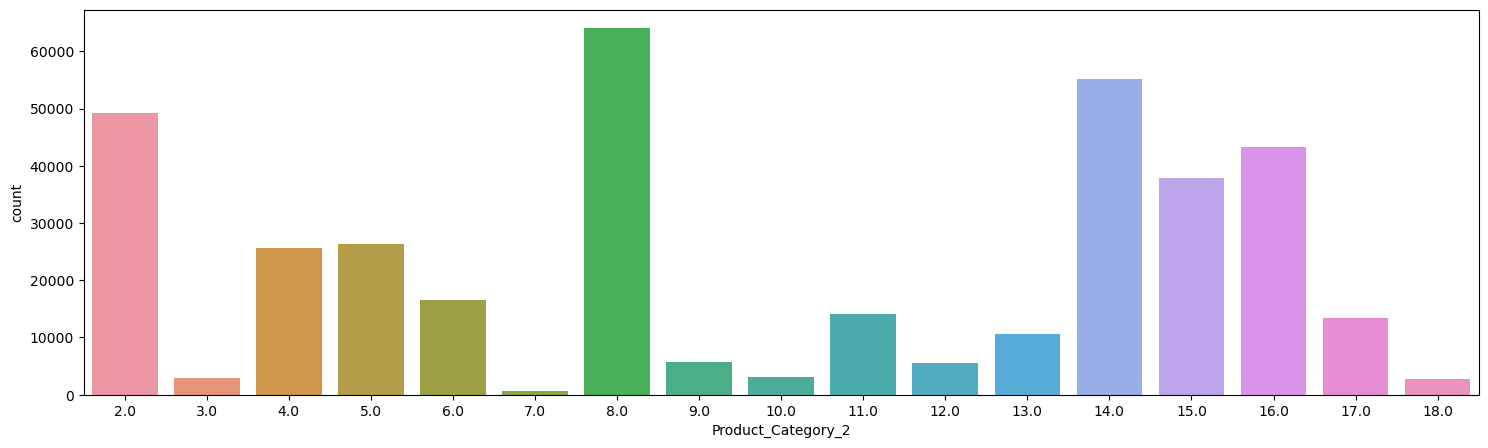

In [80]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_2'])
plt.show()

In [6]:
from plotly.offline import init_notebook_mode, plot, iplot
plt.figure(figsize=(6,4))
labels = list(data.Product_Category_2.value_counts().index)
values = list(data.Product_Category_2.value_counts().values)

fig = {"data":[{"labels" : labels,"values" : values,"hoverinfo" :'label+percent',"domain": {"x": [0, .9]},"type" : "pie",
            "rotation":120,},],"layout": {"title" : "Distribution of the Product",
       "annotations": [{"font": {"size":20},"showarrow": True,"text": "ProductCategory2", "x":0.2,"y":0.9,},]}}
iplot(fig)
plt.show()

<Figure size 600x400 with 0 Axes>

It is clear that ProductCategory2 numbers 2,8,14 and 16 stand out. Unfortunately we don't know which product each number represents as it is masked.

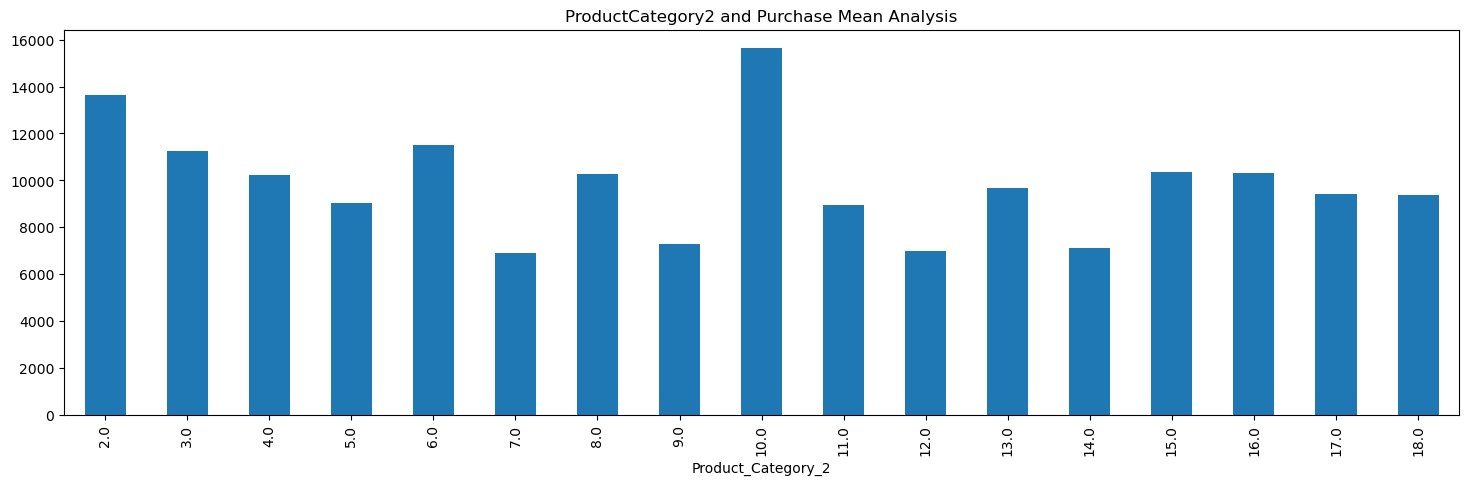

In [84]:
data.groupby('Product_Category_2').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("ProductCategory2 and Purchase Mean Analysis")
plt.show()

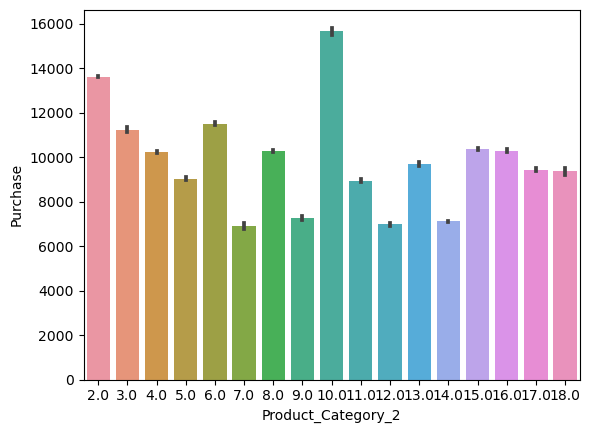

In [114]:
sns.barplot(x=data["Product_Category_2"], y=data["Purchase"])
plt.show()

If you see the value spent on average for ProductCategory2 you see that although there were more products bought for categories 2,8,14,16 the average amount spent for those two is not the highest wherease in 2 it is high as compare to other two. It is interesting to see other categories i.e 10,2,6,9,3 appearing with high purchase values despite having low impact on sales number.

#### Product_Category_3

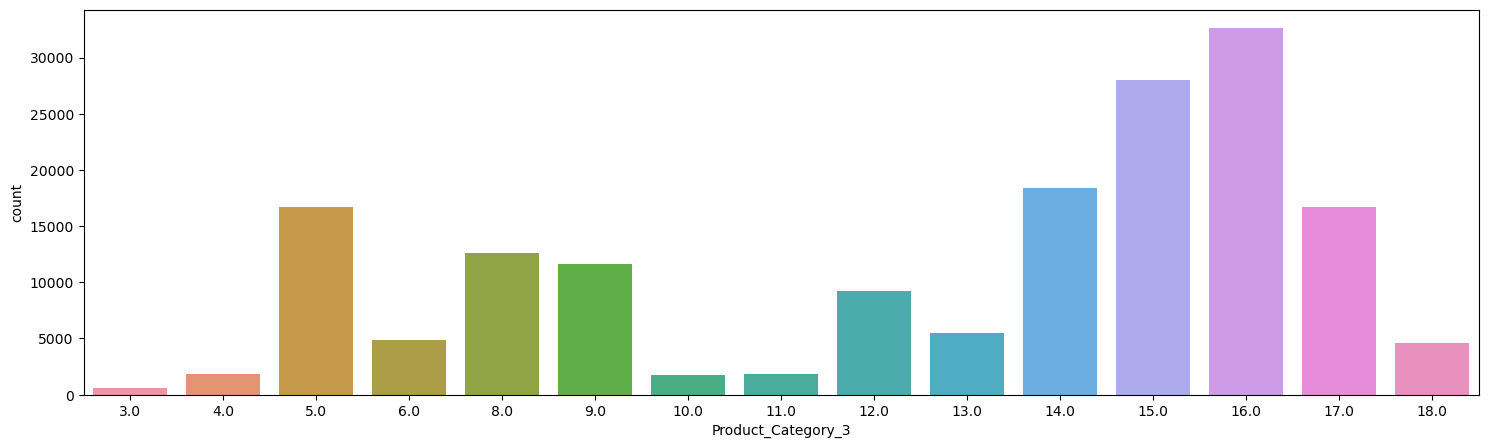

In [92]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_3'])
plt.show()

In [7]:
from plotly.offline import init_notebook_mode, plot, iplot
plt.figure(figsize=(6,4))
labels = list(data.Product_Category_3.value_counts().index)
values = list(data.Product_Category_3.value_counts().values)

fig = {"data":[{"labels" : labels,"values" : values,"hoverinfo" :'label+percent',"domain": {"x": [0, .9]},"type" : "pie",
            "rotation":120,},],"layout": {"title" : "Distribution of the Product",
       "annotations": [{"font": {"size":20},"showarrow": True,"text": "ProductCategory3", "x":0.2,"y":0.9,},]}}
iplot(fig)
plt.show()

<Figure size 600x400 with 0 Axes>

It is clear that ProductCategory3 numbers 16,15,17 and 14 stand out. Unfortunately we don't know which product each number represents as it is masked.

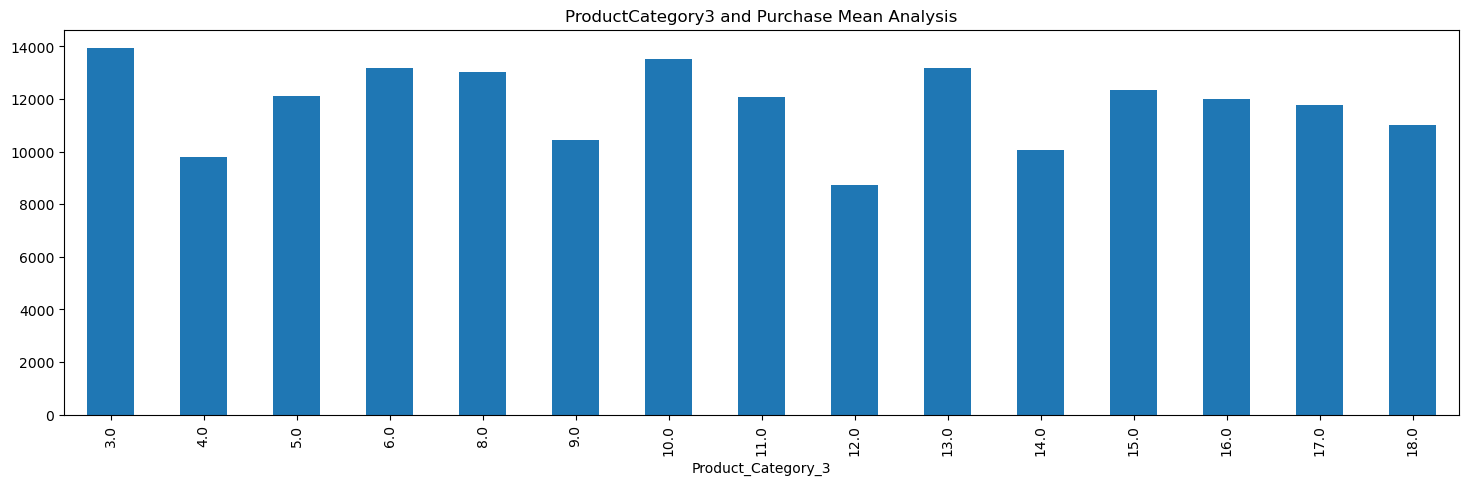

In [95]:
data.groupby('Product_Category_3').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("ProductCategory3 and Purchase Mean Analysis")
plt.show()

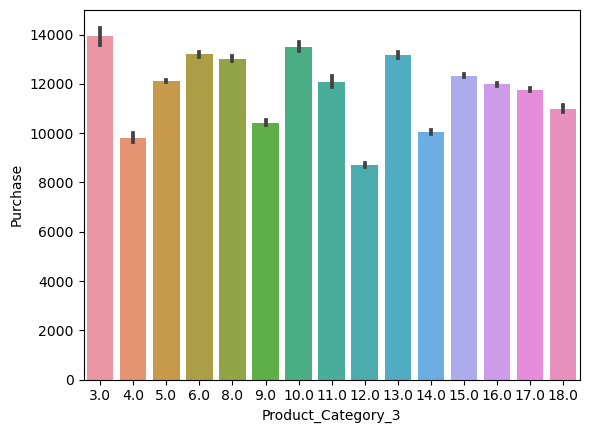

In [113]:
sns.barplot(x=data["Product_Category_3"], y=data["Purchase"])
plt.show()

If you see the value spent on average for ProductCategory3 you see that although there were more products bought for categories 16,15,14,17 the average amount spent for those thrree is not the highest. It is interesting to see other categories i.e 3,10,13,6 appearing with high purchase values despite having low impact on sales number and their is not much difference in other categories.

## Top 10 Users

In [104]:
data.groupby('User_ID', as_index=False).agg({'Purchase':'sum'}).sort_values(by='Purchase',ascending=False).head(10)

User_ID  Purchase
4166  1004277  10536909
1634  1001680   8699596
2831  1002909   7577756
1885  1001941   6817493
416   1000424   6573609
4335  1004448   6566245
5683  1005831   6512433
981   1001015   6511314
3297  1003391   6477160
1142  1001181   6387961

## Top 10 Product

In [105]:
data.groupby('Product_ID', as_index=False).agg({'Purchase':'count'}).sort_values(by='Purchase',ascending=False).head(10)

Product_ID  Purchase
2536  P00265242      1880
249   P00025442      1615
1016  P00110742      1612
1030  P00112142      1562
565   P00057642      1470
1745  P00184942      1440
458   P00046742      1438
569   P00058042      1422
1355  P00145042      1406
582   P00059442      1406

Based on the data above, we can understand that the "Product_id" and "Product_Category" have the greatest impact on the purchase amount, and the smallest is 'Stay_In_Current_City_Years', 'Marital_Status', 'Age'.

#### Correlation()

In [110]:
data.corr()

User_ID  Occupation  Marital_Status  Product_Category_1  \
User_ID             1.000000   -0.023971        0.020443            0.003825   
Occupation         -0.023971    1.000000        0.024280           -0.007618   
Marital_Status      0.020443    0.024280        1.000000            0.019888   
Product_Category_1  0.003825   -0.007618        0.019888            1.000000   
Product_Category_2  0.001529   -0.000384        0.015138            0.540583   
Product_Category_3  0.003419    0.013263        0.019473            0.229678   
Purchase            0.004716    0.020833       -0.000463           -0.343703   

                    Product_Category_2  Product_Category_3  Purchase  
User_ID                       0.001529            0.003419  0.004716  
Occupation                   -0.000384            0.013263  0.020833  
Marital_Status                0.015138            0.019473 -0.000463  
Product_Category_1            0.540583            0.229678 -0.343703  
Product_Category_2            1.000000            0.543649 -0.209918  
Product_Category_3            0.543649            1.000000 -0.022006  
Purchase                     -0.209918           -0.022006  1.000000

#### HeatMap

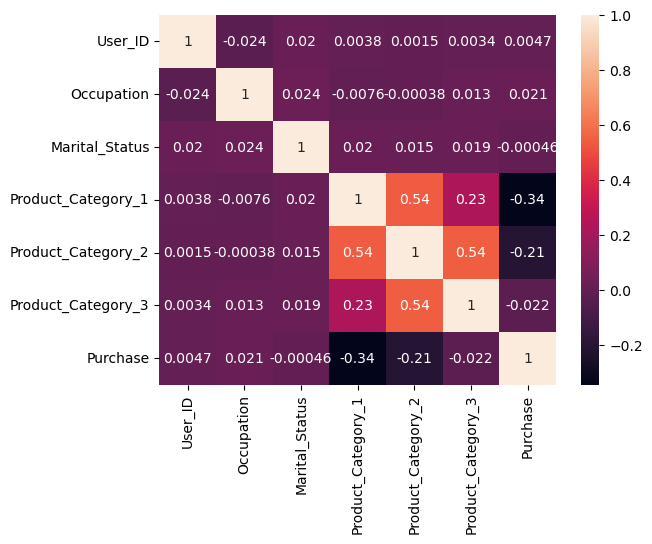

In [33]:
sns.heatmap(data.corr(),annot=True)#its gives the realation between two variables
plt.show()

There is a some corellation between the product category groups.

We can see that Age, Gender and Occcupation has a low impact on the Purchase amount, while product category and Product ID has a high impact on the purchases amount

In [ ]:
# df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace(to_replace="4+",value="4")
#Dummy Variables:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])

## Modeling

##### Data Preprocessing

In [3]:
data.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

#### Dropping the irrelevant columns

In [4]:
df = data.drop(["User_ID","Product_ID"],axis=1)


In [5]:
df.head()

Gender   Age  Occupation City_Category Stay_In_Current_City_Years  \
0      F  0-17          10             A                          2   
1      F  0-17          10             A                          2   
2      F  0-17          10             A                          2   
3      F  0-17          10             A                          2   
4      M   55+          16             C                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                 NaN                 NaN   
1               0                   1                 6.0                14.0   
2               0                  12                 NaN                 NaN   
3               0                  12                14.0                 NaN   
4               0                   8                 NaN                 NaN   

   Purchase  
0      8370  
1     15200  
2      1422  
3      1057  
4      7969

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


#### Filling The Nan Values

In [7]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
mean_value_for_nan_PC2 = df['Product_Category_2'].mean()
df['Product_Category_2'] = df['Product_Category_2'].fillna(mean_value_for_nan_PC2, inplace=True)
df.isnull().sum()
# we cant change all nan values to the mean as . mean does not consider elements of nan value so will replace it by 0

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            550068
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
df['Product_Category_2'] = df['Product_Category_2'].fillna('0')
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            383247
Purchase                           0
dtype: int64

In [10]:
df['Product_Category_3'] = df['Product_Category_2'].fillna('0')
df.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [11]:
df.dtypes

Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2            object
Product_Category_3            object
Purchase                       int64
dtype: object

Product_Category_1 and Product_category_2 should be in int types for the proper further prediction

In [12]:
df['Product_Category_2']=df['Product_Category_2'].astype(int)
df['Product_Category_3']=df['Product_Category_3'].astype(int)
df.dtypes

Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int32
Product_Category_3             int32
Purchase                       int64
dtype: object

#### Convert categorical data into integer using map function

In [13]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [14]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [15]:
df["City_Category"] = df["City_Category"].map({"A": 0, "B": 1, "C": 2}).astype(int)

In [16]:
df["Gender"] = df["Gender"].map({"F": 0, "M": 1}).astype(int)

One Hot Encoding in Stay_In_Current_City_Years

In [17]:
# df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace(to_replace="4+",value="4")
#Dummy Variables:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])

In [18]:
df.head()

Gender   Age  Occupation  City_Category  Marital_Status  \
0       0  0-17          10              0               0   
1       0  0-17          10              0               0   
2       0  0-17          10              0               0   
3       0  0-17          10              0               0   
4       1   55+          16              2               0   

   Product_Category_1  Product_Category_2  Product_Category_3  Purchase  \
0                   3                   0                   0      8370   
1                   1                   0                   0     15200   
2                  12                   0                   0      1422   
3                  12                   0                   0      1057   
4                   8                   0                   0      7969   

   Stay_In_Current_City_Years_0  Stay_In_Current_City_Years_1  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   Stay_In_Current_City_Years_2  Stay_In_Current_City_Years_3  \
0                             1                             0   
1                             1                             0   
2                             1                             0   
3                             1                             0   
4                             0                             0   

   Stay_In_Current_City_Years_4+  
0                              0  
1                              0  
2                              0  
3                              0  
4                              1

#### Map range variables into integers
age {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}

data["Age"] = data["Age"].map(lambda x: int(x.split("-")[0]))

In [19]:
df["Age"] = df["Age"].map({'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6} ).astype(int)

age_ranges = {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6} data['Age'] = data['Age'].map(age_ranges) data

In [20]:
df.dtypes

Gender                           int32
Age                              int32
Occupation                       int64
City_Category                    int32
Marital_Status                   int64
Product_Category_1               int64
Product_Category_2               int32
Product_Category_3               int32
Purchase                         int64
Stay_In_Current_City_Years_0     uint8
Stay_In_Current_City_Years_1     uint8
Stay_In_Current_City_Years_2     uint8
Stay_In_Current_City_Years_3     uint8
Stay_In_Current_City_Years_4+    uint8
dtype: object

Convert all the Categorical column into Numerical columns

#### Checking of Outliers

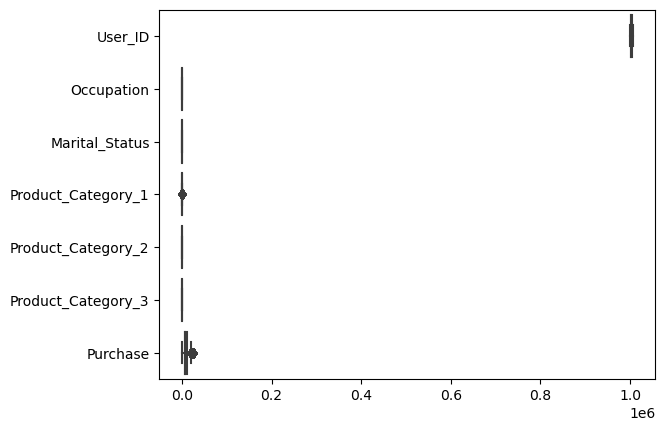

In [7]:
#boxplot help to visualize outlier clearly
sns.boxplot(data=data,orient='h')
plt.show()

In [5]:
#store the category and number columns in different variable
cats = list(data.select_dtypes(include=['object','bool']) )
nums = list(data.select_dtypes(include=['int64','float64']))
print(cats)
print(nums)

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


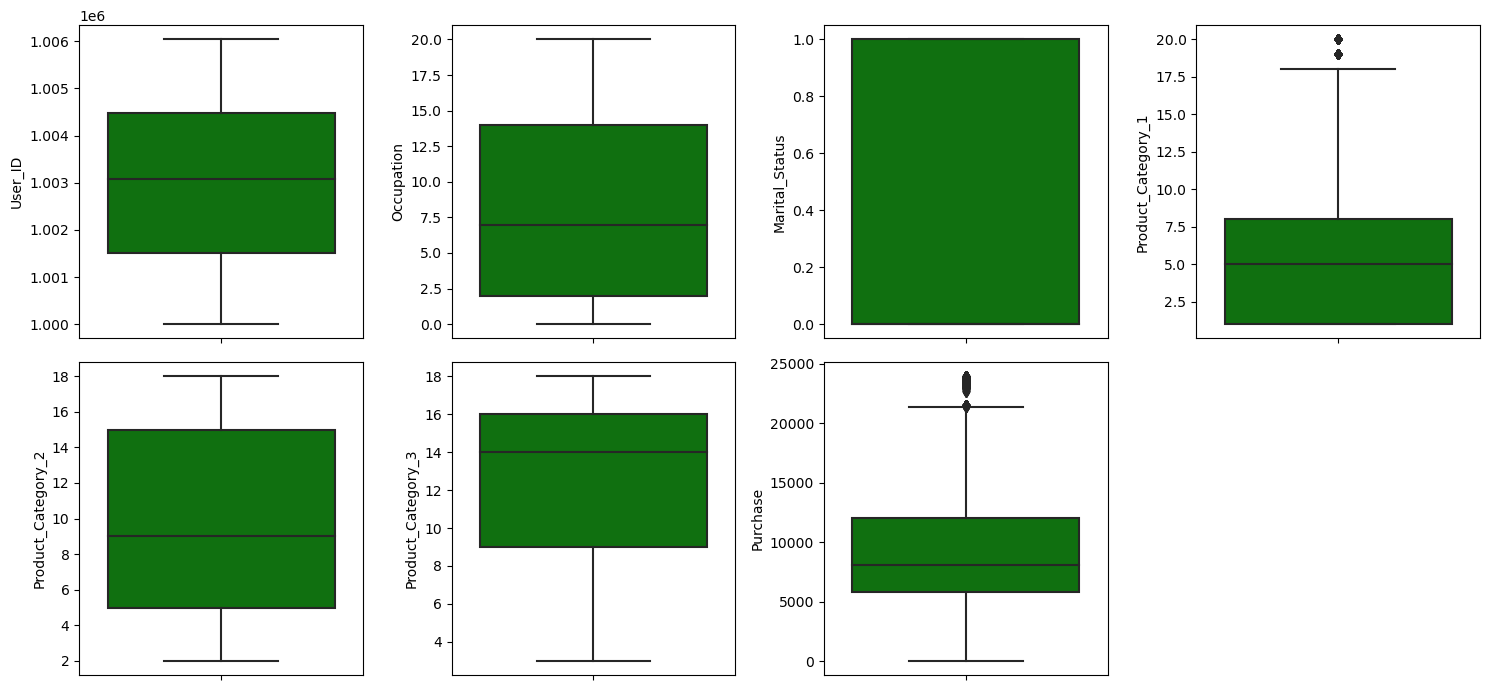

In [23]:
#boxplot help to visualize outlier clearly
plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=data[nums[i]],color='green',orient='v')
    plt.tight_layout()

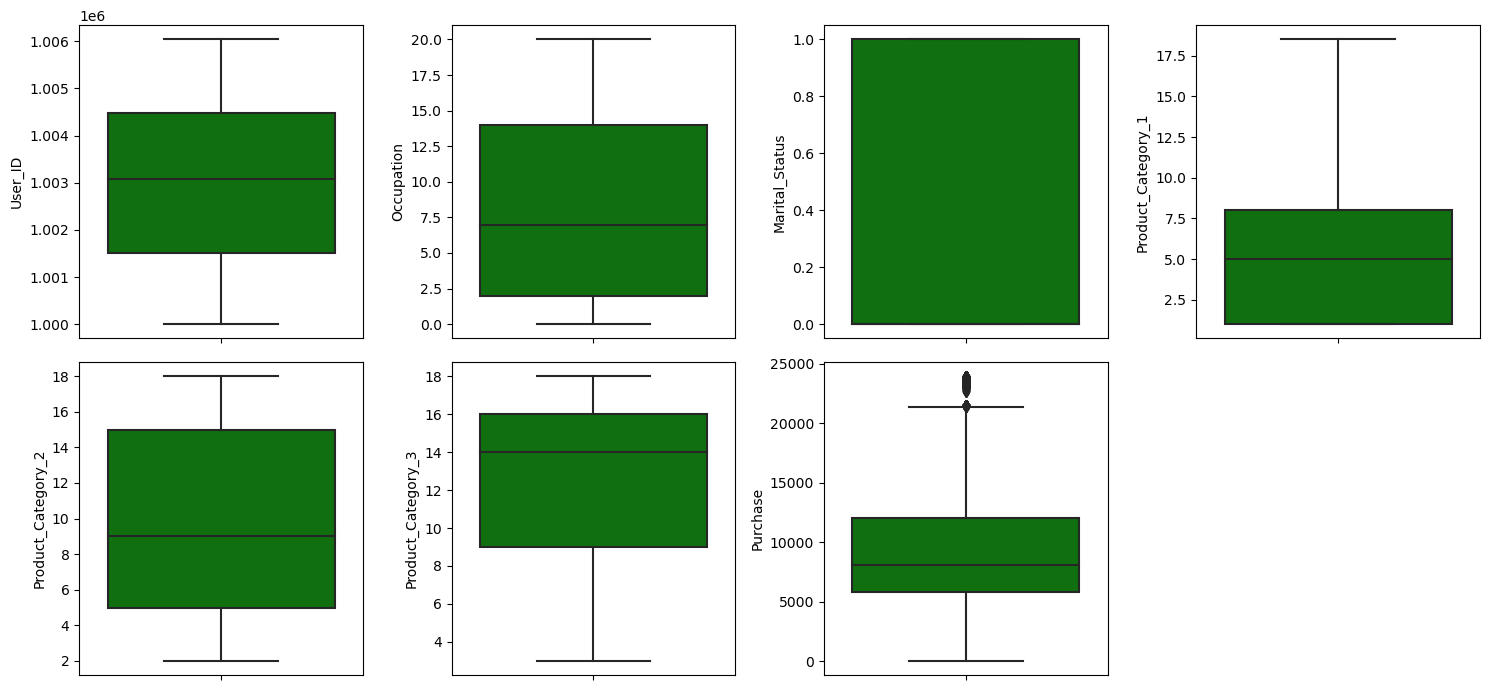

In [15]:
def replace_outliers(var1):
    IQR=data[var1].quantile(0.75)-data[var1].quantile(0.25)
    lower_val=data[var1].quantile(0.25)-(IQR*1.5)
    upper_val=data[var1].quantile(0.75)+(IQR*1.5)
    data.loc[data[var1]>=upper_val,var1]=upper_val
    data.loc[data[var1]<=lower_val,var1]=lower_val 
variables=['Product_Category_1']
for x in variables:
    replace_outliers(x)
plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=data[nums[i]],color='green',orient='v')
    plt.tight_layout()

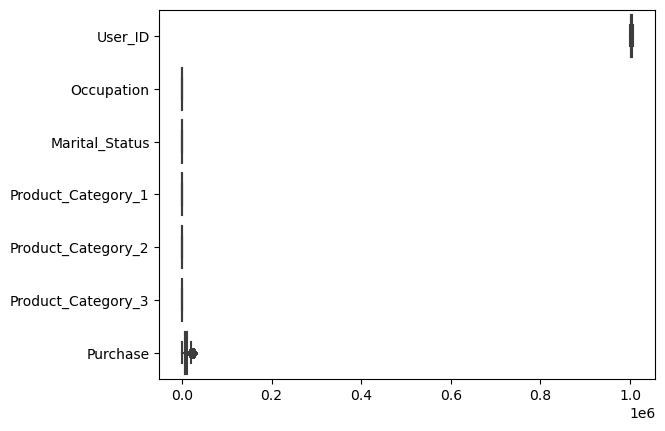

In [16]:
sns.boxplot(data=data,orient='h');

Successfully Remove the Outliers except purchase

#### Splitting data into independent and dependent variables

In [21]:
X = df.drop("Purchase",axis=1)
y=df['Purchase']

In [22]:
print('The shape of X:',X.shape)  # all column (features)except targeted
print('The shape of y:',y.shape) # targeted

The shape of X: (550068, 13)
The shape of y: (550068,)


In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   Gender                         550068 non-null  int32
 1   Age                            550068 non-null  int32
 2   Occupation                     550068 non-null  int64
 3   City_Category                  550068 non-null  int32
 4   Marital_Status                 550068 non-null  int64
 5   Product_Category_1             550068 non-null  int64
 6   Product_Category_2             550068 non-null  int32
 7   Product_Category_3             550068 non-null  int32
 8   Stay_In_Current_City_Years_0   550068 non-null  uint8
 9   Stay_In_Current_City_Years_1   550068 non-null  uint8
 10  Stay_In_Current_City_Years_2   550068 non-null  uint8
 11  Stay_In_Current_City_Years_3   550068 non-null  uint8
 12  Stay_In_Current_City_Years_4+  550068 non-null  uint8
dtyp

##### Feature Scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X_1=min_max.fit_transform(X)  # in transform when we want to convert some entities into another entities
X_1

array([[0.        , 0.        , 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.5       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.33333333, 0.75      , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.05      , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.66666667, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [30]:
X=pd.DataFrame(X_1,columns=X.columns) #X.columns is use to referred the columns
X.head()  # all the numerical value are between 0 to 1

Gender  Age  Occupation  City_Category  Marital_Status  Product_Category_1  \
0     0.0  0.0         0.5            0.0             0.0            0.105263   
1     0.0  0.0         0.5            0.0             0.0            0.000000   
2     0.0  0.0         0.5            0.0             0.0            0.578947   
3     0.0  0.0         0.5            0.0             0.0            0.578947   
4     1.0  1.0         0.8            1.0             0.0            0.368421   

   Product_Category_2  Product_Category_3  Stay_In_Current_City_Years_0  \
0                 0.0                 0.0                           0.0   
1                 0.0                 0.0                           0.0   
2                 0.0                 0.0                           0.0   
3                 0.0                 0.0                           0.0   
4                 0.0                 0.0                           0.0   

   Stay_In_Current_City_Years_1  Stay_In_Current_City_Years_2  \
0                           0.0                           1.0   
1                           0.0                           1.0   
2                           0.0                           1.0   
3                           0.0                           1.0   
4                           0.0                           0.0   

   Stay_In_Current_City_Years_3  Stay_In_Current_City_Years_4+  
0                           0.0                            0.0  
1                           0.0                            0.0  
2                           0.0                            0.0  
3                           0.0                            0.0  
4                           0.0                            1.0

#### Split the data into traning & testing data

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(385047, 13)
(165021, 13)
(385047,)
(165021,)


#### Distribution of Targeted variables in train and test

In [26]:
print('Distribution of Targeted variables in train data',y_train.value_counts()/len(y_train))
print('Distribution of Targeted variables in test data',y_test.value_counts()/len(y_test))

Distribution of Targeted variables in train data 7011     0.000371
7193     0.000369
6858     0.000369
7146     0.000361
6855     0.000358
           ...   
2651     0.000003
17218    0.000003
3305     0.000003
10406    0.000003
18173    0.000003
Name: Purchase, Length: 17380, dtype: float64
Distribution of Targeted variables in test data 7089     0.000406
6884     0.000400
6931     0.000388
6970     0.000388
6883     0.000382
           ...   
1650     0.000006
9370     0.000006
20190    0.000006
23505    0.000006
20731    0.000006
Name: Purchase, Length: 15458, dtype: float64


#### Linear Regression

In [263]:
from sklearn.linear_model import LinearRegression
import numpy as np
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [264]:
from sklearn.metrics import mean_squared_error

In [272]:
train_predict=lr.predict(X_train)
rerror_score_train=np.sqrt(mean_squared_error(y_train,train_predict))#np.sqrt is becoz we have to find root mean squared error
print('The Root mean squared error of Linear Regression Model is:',rerror_score_train)

The Root mean squared error of Linear Regression Model is: 4699.890666730313


In [273]:
test_predict1=lr.predict(X_test)
rerror_score_test=np.sqrt(mean_squared_error(y_test,test_predict1))
print('The Root mean squared error Linear Regression Model is:',rerror_score_test)

The Root mean squared error Linear Regression Model is: 4700.968134811108


In [274]:
train_predict=lr.predict(X_train)
error_score_train=mean_squared_error(y_train,train_predict)
print('the mean squared error is:',error_score_train)

the mean squared error is: 22088972.279218704


In [275]:
test_predict=lr.predict(X_test)
error_score_test=mean_squared_error(y_test,test_predict)
print('the mean squared error is:',error_score_test)

the mean squared error is: 22099101.404509425


##### Mean Absolute error

In [276]:
y_pred = lr.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
mean_absolute_error(y_test, y_pred)

3602.165237587186

#### r2_score

In [277]:
r2_score(y_test, y_pred)

0.12413656863554767

#### Scatter Plot

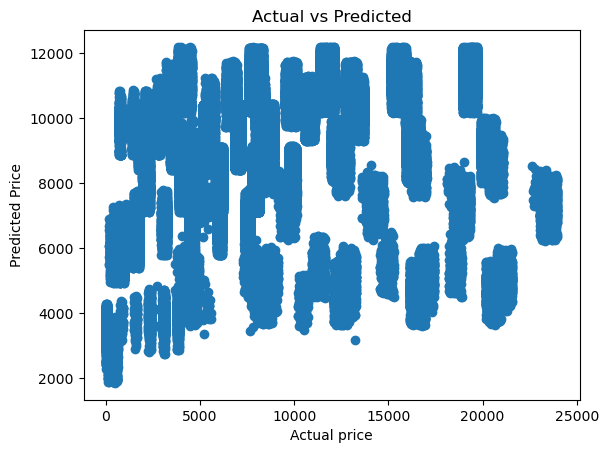

In [278]:
#for train data
plt.scatter(y_train,train_predict);
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted')
plt.show()

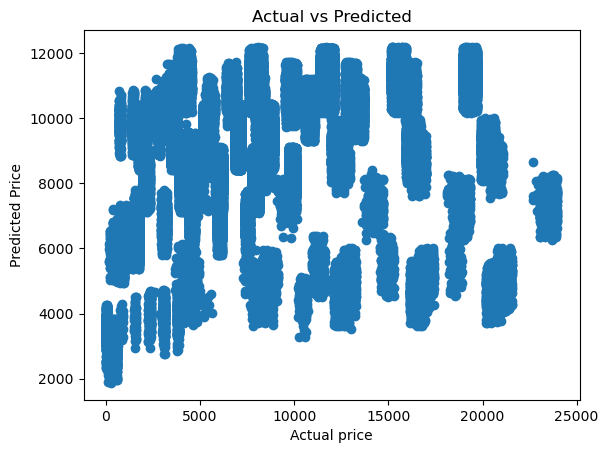

In [279]:
#for test data
plt.scatter(y_test,test_predict1);
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted')
plt.show()

##### The Root mean squared error Linear Regression Model is: 4700.968134811108

## DecisionTreeRegressor

In [284]:
parameters={'splitter':['best','random'],#randomly split krta hai
    'max_depth':[2,4,6],#range
    'min_samples_leaf':[1,2,3],
    'max_features':['auto','log2','sqrt','none'],#range
    'max_leaf_nodes':[10,20]
}

In [39]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import StratifiedKFold,KFold

In [286]:
DTR = DecisionTreeRegressor()

In [287]:
skf=KFold(n_splits=10,random_state=42,shuffle=True)

In [288]:
tuning_model=GridSearchCV(DTR,param_grid=parameters,scoring='neg_mean_squared_error',cv=skf,n_jobs=-1)

In [290]:
tuning_model.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'log2', 'sqrt', 'none'],
                         'max_leaf_nodes': [10, 20],
                         'min_samples_leaf': [1, 2, 3],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [291]:
tuning_model.best_params_

{'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': 20,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [292]:
DT=DecisionTreeRegressor(max_depth=6,max_features='auto',max_leaf_nodes=20,min_samples_leaf=1,splitter='best')

In [293]:
DT.fit(X_train,y_train)#data is train in this #best parameter ko train mai fit krege

DecisionTreeRegressor(max_depth=6, max_features='auto', max_leaf_nodes=20)

In [294]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error,r2_score

In [295]:
pred1=DT.predict(X_train)
np.sqrt(mean_squared_error(pred1,y_train))

3019.5780030762558

In [296]:
pred2=DT.predict(X_test)
np.sqrt(mean_squared_error(pred2,y_test))

3019.7464020222333

In [297]:
pred1=DT.predict(X_train)
np.sqrt(mean_squared_log_error(pred1,y_train))

0.4023927700658545

In [298]:
pred2=DT.predict(X_test)
np.sqrt(mean_squared_log_error(pred2,y_test))

0.40457378564074614

In [299]:
pred1=DT.predict(X_train)
(r2_score(pred1,y_train))

0.43413395438025315

In [300]:
pred1=DT.predict(X_train)
(r2_score(pred1,y_train))

0.43413395438025315

##### This is best or good model

In [301]:
mean_absolute_error(y_test, dt_y_pred)

2175.713322667647

In [302]:
mean_squared_error(y_test, dt_y_pred)

8850398.658912648

In [303]:
r2_score(y_test, dt_y_pred)

0.6492282470473302

##### The accuracy is 64%

In [305]:
from math import sqrt
print("RMSE of Test in Linear Regression Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE of Test in Linear Regression Model is  2974.961959237907


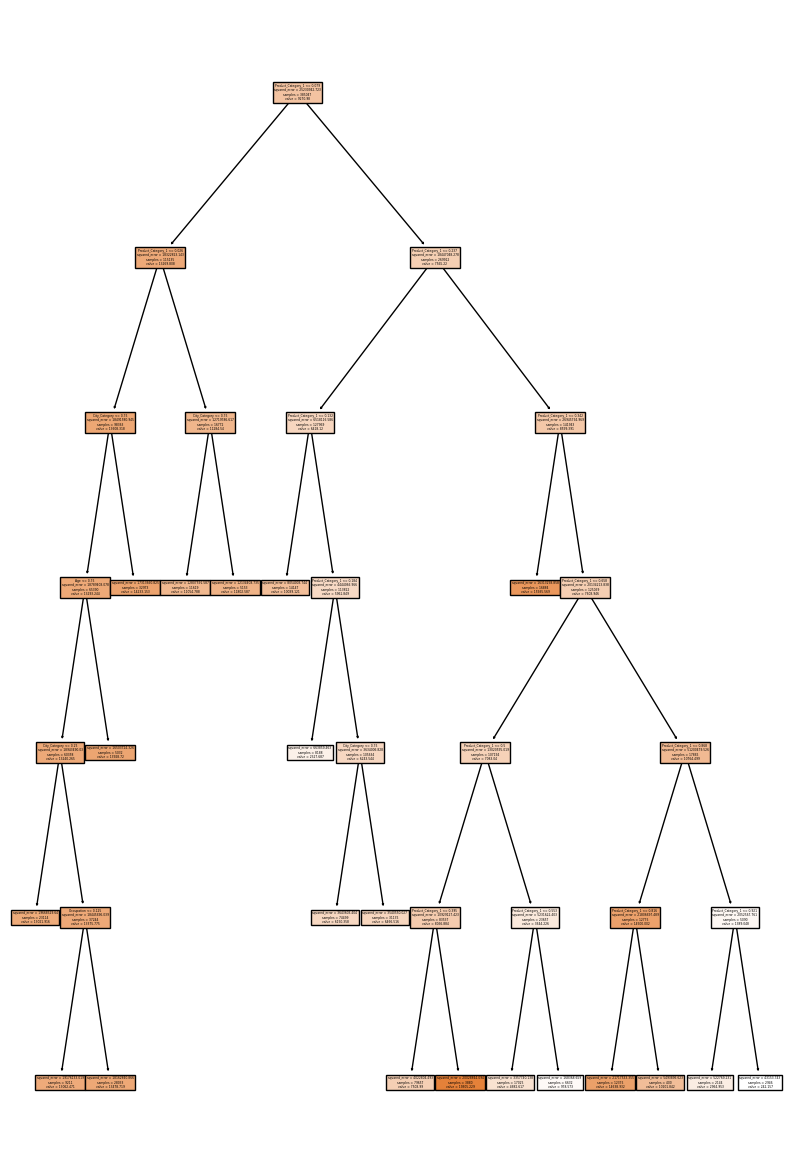

In [308]:
from sklearn import tree
fig=plt.figure(figsize=(10,15))
_= tree.plot_tree(DT,feature_names=X_train.columns,class_names=y_train,filled=True)

#### Random Forest Regressor

In [35]:
RFR=RandomForestRegressor()

In [37]:
parameters={
    'n_estimators':range(1,5),
    'max_depth':[2,4],#range
    'min_samples_leaf':[1,2],
    'max_features':['auto','log2','sqrt','none'],#range
    'max_leaf_nodes':[10,20]
}

In [40]:
skf=KFold(n_splits=10,random_state=42,shuffle=True)

In [41]:
tuning_model=GridSearchCV(RFR,param_grid=parameters,scoring='neg_mean_squared_error',cv=skf,n_jobs=-1)

In [42]:
tuning_model.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4],
                         'max_features': ['auto', 'log2', 'sqrt', 'none'],
                         'max_leaf_nodes': [10, 20], 'min_samples_leaf': [1, 2],
                         'n_estimators': range(1, 5)},
             scoring='neg_mean_squared_error')

In [43]:
tuning_model.best_params_

{'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': 20,
 'min_samples_leaf': 2,
 'n_estimators': 4}

In [45]:
RFR=RandomForestRegressor(max_depth=4,max_features='auto',max_leaf_nodes=20,min_samples_leaf=2,n_estimators=4)

In [46]:
RFR.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, max_leaf_nodes=20, min_samples_leaf=2,
                      n_estimators=4)

In [51]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error,r2_score
import numpy as np

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve

##### Model training:

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [71]:
from sklearn.ensemble import RandomForestRegressor

# create a regressor object 
RFregressor = RandomForestRegressor(random_state = 0)  
RFregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [74]:
rf_y_pred = RFregressor.predict(X_test)
mean_absolute_error(y_test, rf_y_pred)

2164.7399776785364

In [75]:
mean_squared_error(y_test, rf_y_pred)

8659867.09043677

##### Training Model accuracy:

In [95]:
pred1 =RFregressor.predict(X_train)
errors = abs(pred1 - y_train)
print('mean absolue error:', round(np.mean(errors),2))
mean_abs_per_error = np.mean(100*(errors/y_train))
accuracy = 100 - mean_abs_per_error
print('Training Accuracy score is', round(accuracy,2), '%')

mean absolue error: 2035.06
Training Accuracy score is 69.33 %


In [97]:
score = RFregressor.score(X_train,y_train)
print('Training Model Accuracy is',score)

Training Model Accuracy is 0.6970001293396286


 Training Model Accuracy is 69%

##### Testing Model accuracy:

In [98]:
pred1 = RFregressor.predict(X_test)
errors = abs(pred1 - y_test)
print('mean absolue error:', round(np.mean(errors),2))
mean_abs_per_error = np.mean(100*(errors/y_test))
accuracy = 100 - mean_abs_per_error
print('Testing Accuracy score is', round(accuracy,2), '%')

mean absolue error: 2164.74
Testing Accuracy score is 66.97 %


In [82]:
y_pred5 = RFregressor.predict(X_test)
rscore=r2_score(y_test, y_pred5)
rscore

0.6567796687225338

In [83]:
rscore=r2_score(y_test, rf_y_pred)
print('Testing Accuracy is',rscore)

Testing Accuracy is 0.6567796687225338


Testing Accuracy is 66%

In [84]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE of Linear Regression Model is  2942.7652115717233


In [87]:
df['Prediction']=RFregressor.predict(X)

##### Prediction vs Actual purchase:

In [99]:
df.head(10)

Gender  Age  Occupation  City_Category  Marital_Status  Product_Category_1  \
0       0    0          10              0               0                   3   
1       0    0          10              0               0                   1   
2       0    0          10              0               0                  12   
3       0    0          10              0               0                  12   
4       1    6          16              2               0                   8   
5       1    2          15              0               0                   1   
6       1    4           7              1               1                   1   
7       1    4           7              1               1                   1   
8       1    4           7              1               1                   1   
9       1    2          20              0               1                   8   

   Product_Category_2  Product_Category_3  Purchase  \
0                   0                   0      8370   
1                   0                   0     15200   
2                   0                   0      1422   
3                   0                   0      1057   
4                   0                   0      7969   
5                   0                   0     15227   
6                   0                   0     19215   
7                   0                   0     15854   
8                   0                   0     15686   
9                   0                   0      7871   

   Stay_In_Current_City_Years_0  Stay_In_Current_City_Years_1  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   
5                             0                             0   
6                             0                             0   
7                             0                             0   
8                             0                             0   
9                             0                             1   

   Stay_In_Current_City_Years_2  Stay_In_Current_City_Years_3  \
0                             1                             0   
1                             1                             0   
2                             1                             0   
3                             1                             0   
4                             0                             0   
5                             0                             1   
6                             1                             0   
7                             1                             0   
8                             1                             0   
9                             0                             0   

   Stay_In_Current_City_Years_4+    Prediction  
0                              0  10773.558561  
1                              0  15026.801107  
2                              0   1393.946643  
3                              0   1393.946643  
4                              1   7864.112844  
5                              0  12937.199796  
6                              0  16552.341647  
7                              0  16552.341647  
8                              0  16552.341647  
9                              0   6344.264263

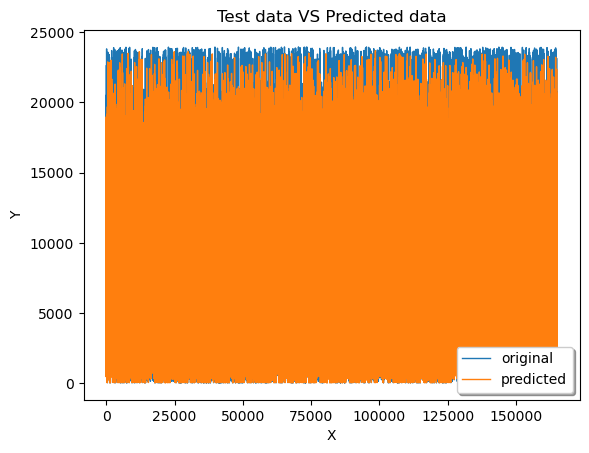

In [103]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth = '1', label="original")
plt.plot(x_ax, y_pred5, linewidth = '1', label="predicted")
plt.title("Test data VS Predicted data")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='lower right',fancybox=True, shadow=True)
plt.show()

### Now we have a model that has been tested with 66% Accuracy that will predict the purchase amount based on the data features.

## XGBoost Regressor

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state= 42, test_size= 0.3)

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
params={
       'n_estimators':range(1,100),
       'max_depth':range(1,15),
       'min_childe_weight':[1,2],
       'gamma':[0,1]}

In [46]:
from xgboost import XGBRFRegressor
from sklearn.model_selection import StratifiedKFold,KFold

In [47]:
cvf=KFold(random_state=42,n_splits=5,shuffle=True)

In [48]:
XGB=XGBRegressor()
Grid_xgb=RandomizedSearchCV(XGB,params,scoring='neg_mean_squared_error',cv=cvf,n_jobs=-1)

In [49]:
Grid_xgb.fit(X_train,y_train)

[00:11:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_childe_weight" } are not used.



RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=Non...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_w

In [50]:
Grid_xgb.best_params_

{'n_estimators': 57, 'min_childe_weight': 2, 'max_depth': 8, 'gamma': 0}

In [51]:
xgb=XGBRegressor(n_estimators=57,min_childe_weight=2,max_depth=8,gamma=0)

In [53]:
xgb.fit(X_train,y_train)

[00:14:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_childe_weight" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, min_childe_weight=2, missing=nan,
             monotone_constraints=None, n_estimators=57, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [54]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error,r2_score

In [55]:
pred1=xgb.predict(X_train)

In [56]:
score1=mean_squared_error(pred1,Y_train)

In [57]:
score1

8209164.386711564

In [58]:
pred2=xgb.predict(X_test)

In [59]:
score2=mean_squared_error(pred2,Y_test)

In [60]:
score2

8596176.431420995

In [62]:
import numpy as np

##### Accuracy of Training Model

In [69]:
#pred1 = RFR.predict(X_train)
errors = abs(pred1 - Y_train)#error = absolute difference predicted -Ytrain
print('mean absolue error:', round(np.mean(errors),2))
mean_abs_per_error = np.mean(100*(errors/Y_train))
accuracy = 100 - mean_abs_per_error
print('Training Model Accuracy score is', round(accuracy,2), '%')

mean absolue error: 2139.87
Training Model Accuracy score is 63.97 %


#### Accuracy of Testing Model

In [68]:
#pred1 = RFR.predict(X_test)
errors = abs(pred2 - Y_test)
print('mean absolue error:', round(np.mean(errors),2))
mean_abs_per_error = np.mean(100*(errors/Y_test))
accuracy = 100 - mean_abs_per_error
print('Testing Model Accuracy score is', round(accuracy,2), '%')

mean absolue error: 2183.11
Testing Model Accuracy score is 62.91 %


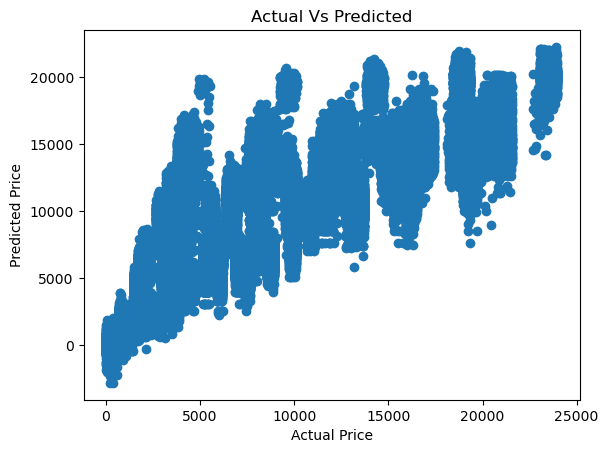

In [65]:
#Scatter plot for train data
plt.scatter(Y_train,pred1)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Vs Predicted')
plt.show()


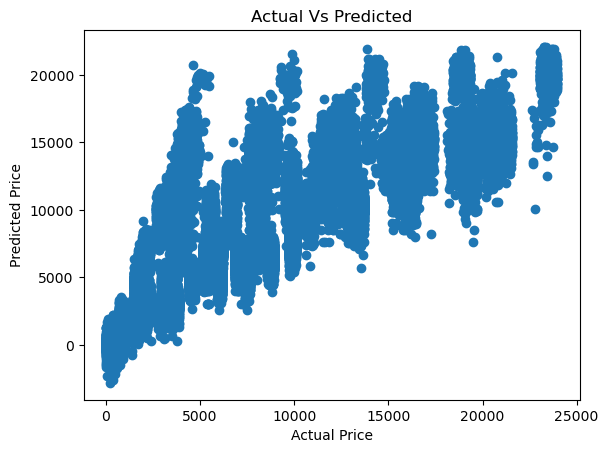

In [66]:
#Scatter plot for test data
plt.scatter(Y_test,pred2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Vs Predicted')
plt.show()


##### Training Accuracy is 63% while Testing Is 62% . This is good model

In [108]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

RMSE of Linear Regression Model is  2934.1319159744426


The ML algorithm that perform the best was XGBoost Regressor Model with RMSE = 2934

#### Conclusion

## Solution:-

## Thank You